## K-Means - NYC Taxi Dataset (NAB)
Prima di utilizzare questo script, bisogna caricare il file csv dei dati [nyc_taxi.csv](https://drive.google.com/file/d/1I7Q0BttBM9sgZ3Ekm6cq6u2fCgcp45ef/view?usp=sharing).

### Anomalie
Le anomalie in questo dataset sono capitate i giorni:
* Maratona di New York - 02/11/2014
* Thanksgiving - 27/11/2014
* Natale
* Capodanno
* Tempesta di neve (13 - 26 Novembre 2014)

In [1]:
# Import delle librerie necessarie
from sklearn.cluster import KMeans
from numpy import sqrt, random, array, argsort
from sklearn.preprocessing import scale
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Costanti
DATASET_PATH = 'nyc_taxi.csv'

In [3]:
# Caricamento dataset
taxi = pd.read_csv(DATASET_PATH)
taxi.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [4]:
# Recupero array di valori dei dati
dataset = np.array(taxi['value'])
dataset

array([10844,  8127,  6210, ..., 27309, 26591, 26288])

## Analisi dei dati con K-Means

In [5]:
# Utilizzo K-Means con 1 cluster

# I dati prima vengono scalati
dataset_scaled = dataset.reshape(-1, 1)

kmeans = KMeans(n_clusters=1).fit(dataset_scaled)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
# Recupero del centroide del cluster
center = kmeans.cluster_centers_
center

array([[15137.56937984]])

In [7]:
# Per ogni dati, calcolo distanza dal centroide
distances = sqrt((dataset_scaled - center)**2)
distances

array([[ 4293.56937984],
       [ 7010.56937984],
       [ 8927.56937984],
       ...,
       [12171.43062016],
       [11453.43062016],
       [11150.43062016]])

In [8]:
# Ordino i valori delle distanze in ordine decrescente ed estraggo i primi 5
order_index = argsort(distances, axis=0)
#indexes = order_index[-5:]
#indexes = order_index[-10:]
#indexes = order_index[-20:]
#indexes = order_index[-50:]
indexes = order_index[-8:]
# Indici dei valori delle anomalie
indexes

array([[10089],
       [10087],
       [10088],
       [10086],
       [ 3261],
       [ 3262],
       [ 5955],
       [ 5954]])

In [15]:
# Preparazione dati per il plot
timestamps = np.array(taxi['timestamp'])
values = np.array(taxi['value'])

anomaly_timestamps = timestamps[indexes]
anomaly_values = values[indexes]
anomaly_timestamps

array([['2015-01-27 04:30:00'],
       ['2015-01-27 03:30:00'],
       ['2015-01-27 04:00:00'],
       ['2015-01-27 03:00:00'],
       ['2014-09-06 22:30:00'],
       ['2014-09-06 23:00:00'],
       ['2014-11-02 01:30:00'],
       ['2014-11-02 01:00:00']], dtype=object)

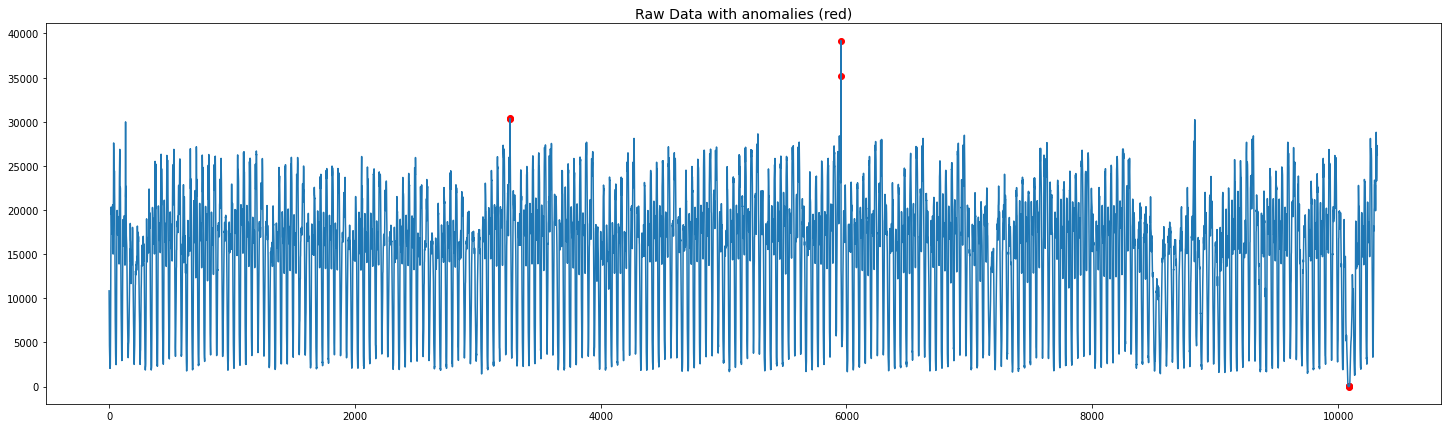

In [10]:
# Plot dei dati con anomalie
fig, axes = plt.subplots(1,1, sharex=True, figsize=(25,7))
axes.plot(np.arange(len(values)), values)
axes.scatter(indexes, anomaly_values, color='r')
axes.set_title('Raw Data with anomalies (red)', size=14)

plt.show()

In [11]:
taxi_plot = pd.read_csv(DATASET_PATH, index_col=0)
taxi_plot.index = pd.to_datetime(taxi_plot.index)
# Creazione eventi anomali
events = {
'independence_day' : ('2014-07-04 00:00:00',
                      '2014-07-07 00:00:00'),
'labor_day'        : ('2014-09-01 00:00:00',
                      '2014-09-02 00:00:00'),
'labor_day_parade' : ('2014-09-06 00:00:00',
                      '2014-09-07 00:00:00'),
'nyc_marathon'     : ('2014-11-02 00:00:00',
                      '2014-11-03 00:00:00'),
'thanksgiving'     : ('2014-11-27 00:00:00',
                      '2014-11-28 00:00:00'),
'christmas'        : ('2014-12-25 00:00:00',
                      '2014-12-26 00:00:00'),
'new_year'         : ('2015-01-01 00:00:00',
                      '2015-01-02 00:00:00'),
'blizzard'         : ('2015-01-26 00:00:00',
                      '2015-01-28 00:00:00')
}
taxi_plot['event'] = np.zeros(len(taxi_plot))
for event, duration in events.items():
    start, end = duration
    taxi_plot.loc[start:end, 'event'] = 1

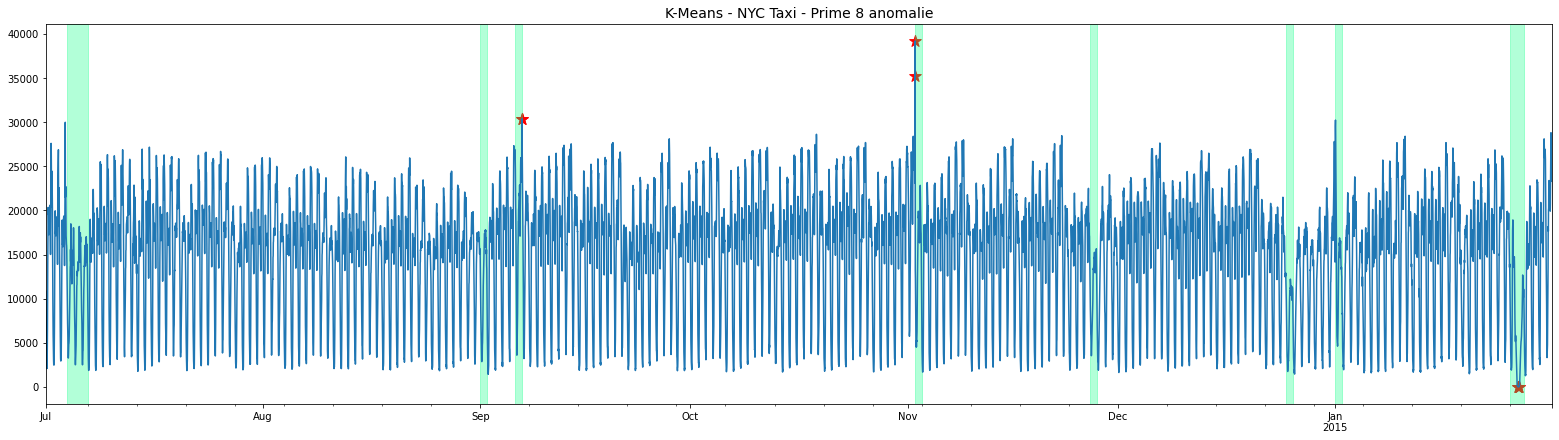

In [20]:
#anomaly_values = anomaly_values / 1000
fig, ax = plt.subplots(1, figsize=(27, 7))
(taxi_plot['value']).plot(ax=ax)

ax.scatter(anomaly_timestamps, anomaly_values, color='red', marker='*', s=150)

for event, duration in events.items():
    start, end = duration
    ax.axvspan(start, end, alpha=0.3,
                  color='springgreen')

ax.set_xlabel('')

ax.set_title('K-Means - NYC Taxi - Prime 8 anomalie', size=14)

fig.savefig('KM_NYC_8_Anomaly.png')
plt.show()